In [1]:
from matplotlib import rc
from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.ticker as tkr
import scipy.stats as stats
from scipy import io

#x = np.concatenate((np.random.normal(1, 3, 1000),np.random.normal(10, 2, 1000)))
data = io.loadmat("sample.mat")
x = data['samples'].reshape(100000)

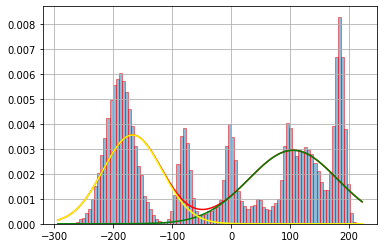

In [2]:

f = np.ravel(x).astype(np.float)
f = f.reshape(-1,1)

g = mixture.GaussianMixture(n_components=2,covariance_type='full')
g.fit(f)
weights = g.weights_
means = g.means_
covars = g.covariances_

plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)
x.sort()
two_pdfs = stats.norm.pdf(np.array([x,x]), means, np.sqrt(covars).ravel().reshape(2,1))
mix_pdf = np.matmul(weights.reshape(1,2), two_pdfs)
plt.plot(x,mix_pdf.ravel(), c='red')
plt.plot(x,two_pdfs[0]*weights[0], c='green')
plt.plot(x,two_pdfs[1]*weights[1], c='yellow')

plt.grid()
plt.show()

In [15]:
# https://xbuba.com/questions/55187037

0.5556578700471235
